
# Problem 1

AR(1) is stationary, $X_{t+1} = \alpha  X_{t} + \beta  V_{t+1}$, $V_{t+1} \sim N(0,1)$ when $-1 < \alpha < 0$:

$$X_{t+1} = \alpha  (\alpha X_{t-1} + \beta V_{t}) + \beta  V_{t+1}
$$
$$ = \alpha^2 X_{t-1} + \alpha \beta V_{t} + \beta V_{t+1}
$$
$$ =  \alpha^2 X_{t-1} + \beta (  V_{t+1} + \alpha V_{t})
$$
$$
...
$$


$$ = \alpha^{t+1} X_{0} + \beta [\sum_{k=0}^t \alpha^k V_{t-k+1}]
$$
$$ = \alpha^{t+1} X_{0} + \beta N_{t+1}
$$
The first part $\alpha ^{t+1} X_{0}$ converges to 0 when t is very big and $-1 < \alpha < 0$, Then $$ X_{t} = \beta [\sum_{k=0}^t \alpha^k V_{t-k}]$$.
For the second part,
Because  $V_{t+1} \sim N(0,1)$, $\sum_{k=0}^t \alpha^k V_{t-k+1}  = \sum_{k=0}^t \alpha^{2k}$
$$E(N_{t+1}) =E(\sum_{k=0}^t \alpha^k V_{t-k+1}) = 0 
$$
$$Var(N_{t+1}) =Var(\sum_{k=0}^t \alpha^k V_{t-k+1})= \sum_{k=0}^t \alpha^{2k}  = \frac{1}{1-\alpha^2}$$,
$$Var(\beta N_{t+1}) =Var(\beta \sum_{k=0}^t \alpha^k V_{t-k+1})= \beta^2 \sum_{k=0}^t \alpha^{2k}  = \frac{\beta^2}{1-\alpha^2}$$,
when $-1 < \alpha < 0$ and t is big.

$$X_{t} \sim N(0, \frac{\beta^2}{1-\alpha^2})$$

# Problem 2

Given 
$$ dX_{t} = k(\mu - X_t)dt + \sigma \eta(t)dt
$$  
Motived by the observation that $\mu$ is supposed to be the long-term mean of the process $X_t$, we can simplyfy the SDE $$ dX_{t} = k(\mu - X_t)dt + \sigma \eta(t)dt $$  by introducing the change of variable $$Y_t = X_t -\mu$$ that subtrcts off the mean. Then $Y_t$ satisfied the SDE: 
$$ dY_t = dX_t = -kY_tdt + \sigma \eta(t) dt$$
In SDE $ dY_t = dX_t = -kY_tdt + \sigma \eta(t) dt$, the process $Y_t$ is seen to have a drift towards the valule zero, at an exponential rate k. This motivates the change of variables
$$ Y_t = \exp ^{-kt} Z_t \longleftrightarrow Z_t = exp ^{kt} Y_t$$,
which should remove the drift. A calculation with the product rule for Ito integrals shows that this is so:
$$dZ_t = k \exp^{kt} Y_t dt + \exp^{kt}dY_t$$
$$ =k \exp^{kt} Y_t dt + \exp^{kt} (-kY_tdt + \sigma \eta(t) dt)$$
$$= 0dt + \sigma \exp^{kt} \eta(t) dt$$.
The solution for $Z_t$ is immediately obtained by Ito-integrating both sides from 0 to t
$$Z_{t} = Z_{0} + \sigma \int_{0}^{t} \exp^{kh'}\eta(h')dh'$$
Reversing the changes of variables, we have:
$$ Y_{t} = \exp ^{-kt} Z_{t} =  \exp ^{-kt} Y_0 + \sigma \exp^{-kt)} \int_{0}^{t} \exp^{kh'}\eta(h')dh'$$,
and 
$$X_{t} = Y_{t} +\mu = \mu + \exp^{-kt}(X_0 - \mu) + \sigma \int_{0}^{t} \exp ^{-k(t-h')} \eta(h') dh'$$

# Problem 3

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

C:\Users\sherryyang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
vix = pd.read_csv('VIX.csv')[['Date', 'Adj Close']]

In [3]:
vix.head()

,Date,Adj Close
0,1990-01-02,17.240000
1,1990-01-03,18.190001
2,1990-01-04,19.219999
3,1990-01-05,20.110001
4,1990-01-08,20.260000


In [4]:
len(vix)

7134

In [5]:
print( 'Test Statistic: %f '%adfuller(vix['Adj Close'])[0] + '\n',
      'P-value: %f ' %adfuller(vix['Adj Close'])[1] +'\n',
      'Critical Values:' + str(adfuller(vix['Adj Close'])[4])
     )

Test Statistic: -4.911476 
 P-value: 0.000033 
 Critical Values:{'1%': -3.431271491214899, '5%': -2.86194722597782, '10%': -2.5669867623171623}


# The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence. According to the test statistic we get, compared with the critical values, we should reject  the null hypothesis, which means the time series of VIX is stationary.

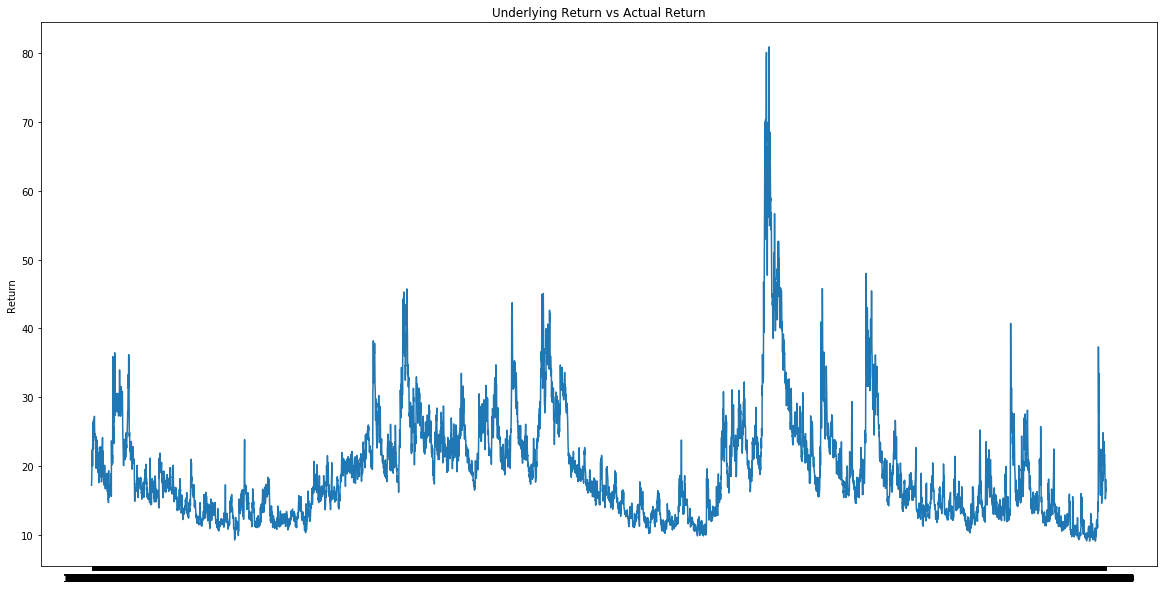

In [7]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(vix['Date'], vix['Adj Close'])
plt.ylabel('Return')
plt.title('Underlying Return vs Actual Return')
plt.show()